In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
video=pd.read_csv('C:\\Users\\SaiJyosthnaYenumula\\OneDrive - Blend 360\\Desktop\\COHORT10\\Stats101\\Assignment session 1\\Videos8.csv')

In [3]:
video.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [4]:
#How long does it take for the video to get trending
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Cleaning Date time format

In [5]:
import datetime
from datetime import datetime

In [6]:
video['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40944    18.14.06
40945    18.14.06
40946    18.14.06
40947    18.14.06
40948    18.14.06
Name: trending_date, Length: 40949, dtype: object

In [7]:
video['trending_date']=video['trending_date'].map(lambda x:datetime.strptime(x, '%y.%d.%m'))

In [8]:
video['publish_time']=video['publish_time'].map(lambda x: x.split('T')[0]).map(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [9]:
video['publish_time']=pd.to_datetime(video['publish_time'])

In [10]:
trending_duration=(video['trending_date']-video['publish_time']).dt.days

checking distribution of views

<Axes: ylabel='Density'>

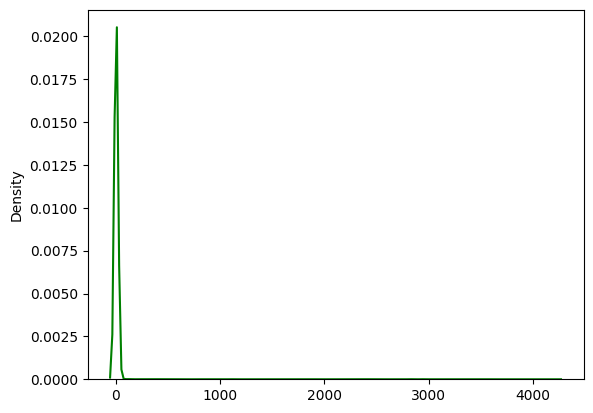

In [11]:
sns.kdeplot(trending_duration,color="Green")

In [12]:
print('Average time in days for video to get trending is {}'.format(np.ceil(trending_duration.mean())))
print('Median of trending duration is',(trending_duration).median())

Average time in days for video to get trending is 17.0
Median of trending duration is 5.0


In [13]:
len(trending_duration)#total videos uploaded

40949

In [14]:
len(trending_duration[trending_duration>3]) #to videos which started trending more than 3 days of publishing

29035

In [15]:
#So on an average it takes 17 days for video to get trending but about half of the videos took more then 3 days to get trending

In [16]:
#Q2.How is this duration changes across the two years

In [17]:
video['publish_time'].dt.year.value_counts()

2018    30279
2017    10428
2013       44
2015       35
2016       35
2014       32
2011       27
2012       24
2010       19
2009       14
2008       11
2006        1
Name: publish_time, dtype: int64

In [18]:
past_two_year=video['publish_time'].dt.year[video['publish_time'].dt.year>2015] #filtering videos published after 2016

Text(0, 0.5, 'Number of days to get Trending')

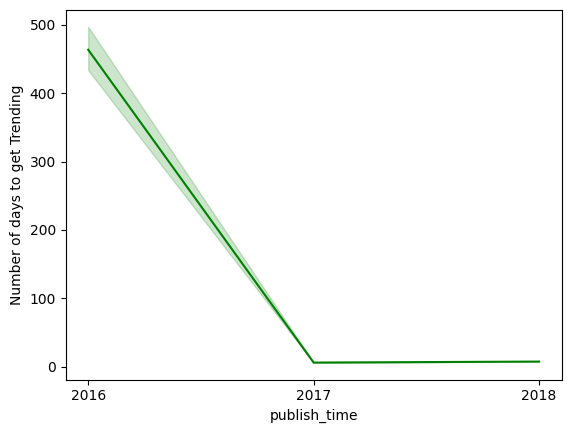

In [19]:
sns.lineplot(x=past_two_year,y=trending_duration,color="Green")
plt.xticks([2016,2017,2018,])
plt.ylabel('Number of days to get Trending')

we can observe drastic dicline in the duration required for video to get trending from 2016 to 2018

In [20]:
#Q3.Channels having multiple trending videos and how many times

In [21]:
trending_by_channel=video['channel_title'].value_counts()#number of videos uploaded by each channel

<Axes: >

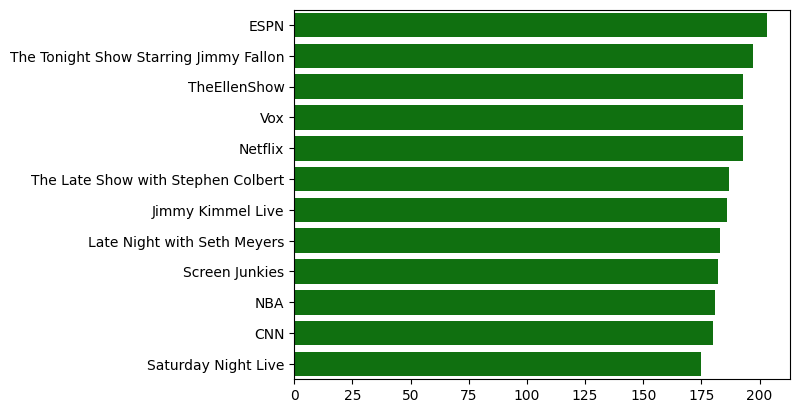

In [22]:
sns.barplot(y=trending_by_channel[trending_by_channel>1].head(12).index,
            x=trending_by_channel[trending_by_channel>1].head(12).values,color='Green')

Channel 'ESPN' has highest trending videos followed by 'The Tonight Show Starring Jimmy Fallon'

In [23]:
#Analysing views and comment

<Axes: xlabel='comment_count', ylabel='views'>

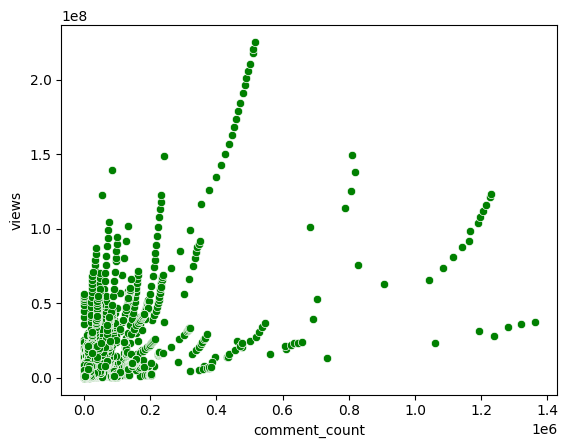

In [24]:
sns.scatterplot(y=video['views'],x=video['comment_count'],color="Green")

In [25]:
#Comments are not contributing that much for views 

<Axes: xlabel='likes', ylabel='views'>

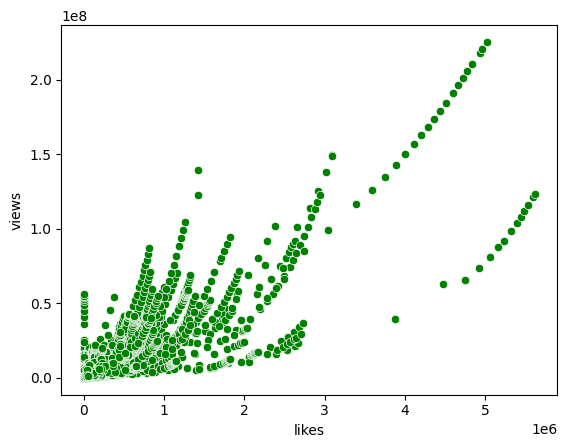

In [26]:
sns.scatterplot(y=video['views'],x=video['likes'],color="Green")

Views increase with more likes 

<Axes: >

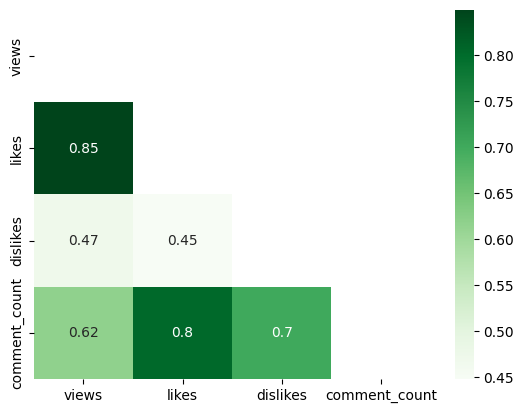

In [27]:
sns.heatmap(video[['views','likes','dislikes','comment_count']].corr(),cmap='Greens',annot=True,
           mask=np.triu(video[['views','likes','dislikes','comment_count']].corr()))

In [28]:
#

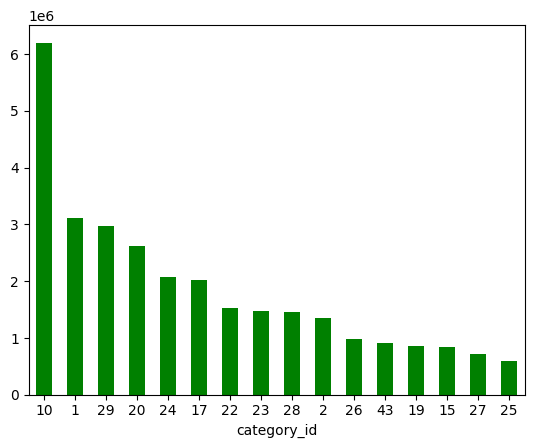

In [29]:
video.groupby(by=['category_id'])['views'].mean().sort_values(ascending=False).plot(kind='bar',color="Green")
plt.xticks(rotation=360);

In [30]:
video['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64